In [3]:
# Define path for files
path = r'/Users/charlesrambo/Desktop/Bootcamp24/Images/'

# Probability
## Discrete Random Variables

In [1]:
import numpy as np
from scipy.stats import binom

# Generate 100,000 simulations
defaults = binom.rvs(n = 25, p = 0.05, loc = 0, size = 100_000, random_state = 0)

# Calculate probability
prob = np.mean(defaults > 1)

print(f'The probability that more than one bond defaults is {prob:.3f}.')

The probability that more than one bond defaults is 0.357.


## Continuous Random Variables

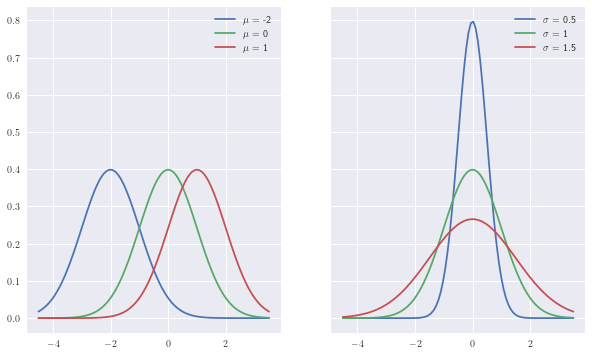

In [4]:
import numpy as np, matplotlib.pyplot as plt
from scipy.stats import norm

# Use latex
plt.rcParams['text.usetex'] = True

# Use Seaborn style
plt.style.use('seaborn')

# Mu- and sigma-values
mu_vals, sigma_vals = [-2, 0, 1], [0.5, 1, 1.5]

# Set up subplots
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (10, 6))

# Get x-values
x_vals = np.linspace(-4.5, 3.5, 100)

# Loop over mu-values
for mu in mu_vals:

    # Note norm.pdf vectorized
    y_vals = norm.pdf(x_vals, loc = mu, scale = 1)
    
    ax[0].plot(x_vals, y_vals, label = r'$\mu =$ ' + str(mu))

# Create legend for first subplot
ax[0].legend()

# Loop over sigma-values
for sigma in sigma_vals:
    
    # Note norm.pdf vectorized; also scale is std not var
    y_vals = norm.pdf(x_vals, loc = 0, scale = sigma)
    
    ax[1].plot(x_vals, y_vals, label = r'$\sigma =$ ' + str(sigma))

# Create legend for second subplot
ax[1].legend()

# Save the figure
plt.savefig(path + r'ex3-1.png')

# Show plot
plt.show()

## Functions of a Random Variable

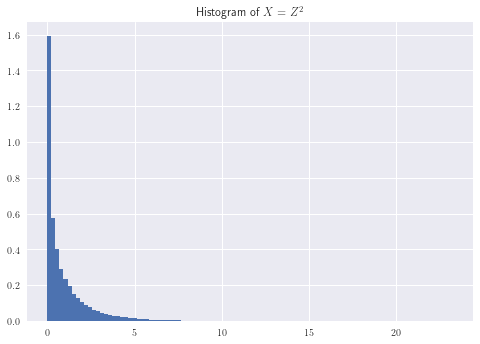

In [112]:
# Import modules
import numpy as np, matplotlib.pyplot as plt
from scipy.stats import norm

# Use LaTeX
plt.rcParams['text.usetex'] = True

# Use Seaborn style
plt.style.use('seaborn')

# Generate Z
Z = norm.rvs(size = 100_000)

# Calculate X
X = Z**2

# Generate histogram; make sure density is True
plt.hist(X, bins = 100, density = True)

# Get title 
plt.title(r'Histogram of $X = Z^2$')

# Save the figure
plt.savefig(path + r'ex3-2.png')

plt.show()

## Portfolio Construction

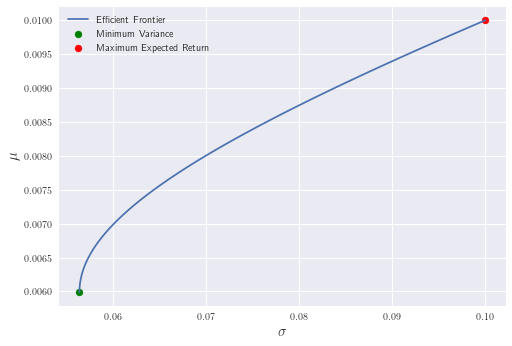

The minimum variance portfolio has respective weights in assets 1 and 2 of 19.8% and 80.2%.


In [113]:
# Import modules
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Use LaTeX
plt.rcParams['text.usetex'] = True

# Use Seaborn style
plt.style.use('seaborn')

# Define expected returns
mu1, mu2 = 0.01, 0.005

# Define standard deviations
sigma1, sigma2 = 0.10, 0.06

# Define correlation
rho = 0.25

# Create function for portfolio expected return
def port_mu(w):
    
    return mu1 * w + mu2 * (1 - w)

# Create function for portfolio standard deviations
def port_sigma(w):
    
    # Calculate variance...
    
    # ... uncorrelated variance
    var = w**2 * sigma1**2 + (1 - w)**2 * sigma2**2 
    
    # ... variance due to correlation
    var +=  2 * w * (1 - w) * rho * sigma1 * sigma2
    
    # Take square root to obtain standard deviation
    return np.sqrt(var)

# Get weights for minimum variance portfolio; no short positions
w_min_var = minimize_scalar(port_sigma, bounds = (0, 1), 
                            method = 'bounded').x

# Define number of samples
samples = 100

# Create data frame to save results
port_results = pd.DataFrame(index = range(samples), 
                            columns = ['mu', 'sigma'])

# Get weights to loop over
wt_vals = np.linspace(w_min_var, 1.0, samples)

# Calculate efficient frontier
for i, w in enumerate(wt_vals):
    
    # Calculate expected return
    mu = port_mu(w)
    
    # Calculate standard deviation
    sigma = port_sigma(w)
    
    # Save results
    port_results.loc[i, ['mu', 'sigma']] = mu, sigma
    

# Plot efficient frontier
plt.plot(port_results['sigma'], port_results['mu'], 
         label = 'Efficient Frontier')

# Add dot for minimum variance portfolio
plt.scatter(port_results.loc[0, 'sigma'], port_results.loc[0, 'mu'], 
            label = 'Minimum Variance', color = 'green')

# Add dot for maximum expected return
plt.scatter(port_results.loc[samples - 1, 'sigma'], 
            port_results.loc[samples - 1, 'mu'], 
            label = 'Maximum Expected Return', color = 'red')

# Add legend
plt.legend()

# Add x-label
plt.xlabel(r'$\sigma$', fontsize = 15)

# Add y-label
plt.ylabel(r'$\mu$', fontsize = 15)

# Save the figure
plt.savefig(path + r'ex3-3.png')

plt.show()

print(r'The minimum variance portfolio has respective weights in', 
      r'assets 1 and 2 of', 
      f'{100 * w_min_var:.1f}% and {100 - 100 * w_min_var:.1f}%.')
      

# Statistics
## Law of Large Numbers

This program took 349.930 seconds.


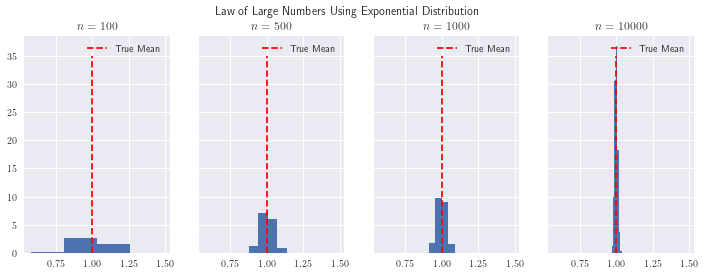

In [5]:
# Import modules
import numpy as np, matplotlib.pyplot as plt, time
from scipy.stats import expon

# Start the clock!
start_time = time.perf_counter()

# Set random seed
np.random.seed(0)

# Use LaTeX
plt.rcParams['text.usetex'] = True

# Use Seaborn style
plt.style.use('seaborn')

# Choose n-values and set number of trials
n_vals, trials = [100, 500, 1000, 10000], 100_000

# Set up subplots
fig, ax = plt.subplots(1, 4, sharex = True, sharey = True, figsize = (12, 4))

for i, n in enumerate(n_vals):
    
    # Generate numbers of dimension trails x n
    X = expon.rvs(size = (trials, n))
    
    # Take mean of each row and make histogram
    ax[i].hist(X.mean(axis = 1), bins = int(np.log(n)), density = True)
    
    ax[i].vlines(x = 1, ymin = 0, ymax = 35, linestyle = 'dashed', 
                 color = 'red', label = 'True Mean')
    
    # Give each histogram a title
    ax[i].title.set_text(f'$n = {n}$')
    
    # Add legend
    ax[i].legend()

# Clear up a little RAM
del X

# Give the entire figure a title
fig.suptitle('Law of Large Numbers Using Exponential Distribution')

# Save the figure
plt.savefig(path + r'ex3-4.png')

plt.plot()

# When my programs run slowly, I like to monitor the time it takes
print(f'This program took {time.perf_counter() - start_time:.3f} seconds.')

## Empirical CDFs

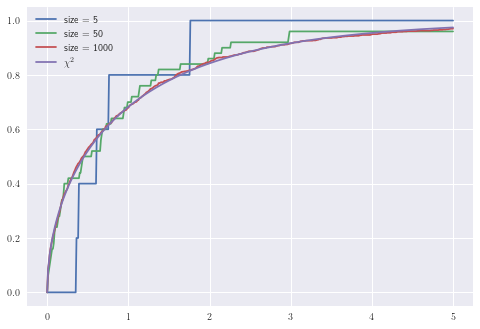

In [115]:
# Import modules
import numpy as np, matplotlib.pyplot as plt
from scipy.stats import chi2

# Use latex
plt.rcParams['text.usetex'] = True

# Use Seaborn style
plt.style.use('seaborn')

# Set random seed
np.random.seed(0)

# Create empirical cdf
ecdf = lambda x, data: np.mean(data <= x)

# List of sample sizes
sample_sizes = [5, 50, 1000]

# Create x-values for plot
x_vals = np.linspace(0, 5, 500)

# Loop over the sample sizes
for sample in sample_sizes:
    
    # Generate data
    data = chi2.rvs(df = 1, size = sample)
    
    # Get the y-values
    y_vals = [ecdf(x, data) for x in x_vals]
    
    # Plot values
    plt.plot(x_vals, y_vals, label = f'size = {sample}')

# Get y-values
y_vals = [chi2.cdf(x, df = 1) for x in x_vals]

# Plot standard normal cdf
plt.plot(x_vals, y_vals, label = f'$\chi^2$')

# Clear up RAM
del data, x_vals, y_vals

# Show legend
plt.legend()

# Save the figure
plt.savefig(path + r'ex3-5.png')

plt.show()

## Central Limit Theorem

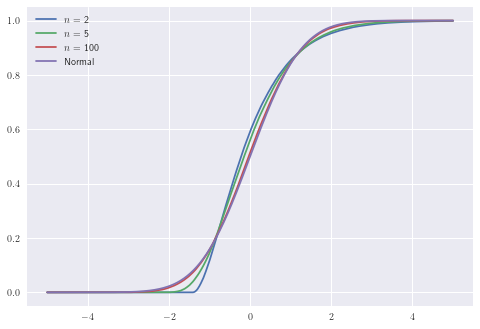

In [6]:
# Import modules
import numpy as np, matplotlib.pyplot as plt
from scipy.stats import expon, norm

# Use LaTeX
plt.rcParams['text.usetex'] = True

# Use Seaborn style
plt.style.use('seaborn')

# Set random seed
np.random.seed(0)

# Create empirical cdf
ecdf = lambda x, data: np.mean(data <= x)

# Create x-values for plot
x_vals = np.linspace(-5, 5, 500)

# Create n_values
n_vals = [2, 5, 100]

# Let's do 100,000 samples
samples = 100_000

# Scale is 1/lambda
lam = 1

# Loop over the n-values
for n in n_vals:
    
    # Generate the data; mean is 1/lam and std is 1/lam
    data =  expon.rvs(scale = 1/lam, size = (samples, n)).mean(axis = 1)
    
    # Change data so it has mean 0 and sd 1; current mean 1/lam and sd 1/(lam * sqrt(n))
    data = np.sqrt(n)/(1/lam) * (data - 1/lam)
    
    # Get y-values
    y_vals = [ecdf(x, data) for x in x_vals]
    
    # Plot values
    plt.plot(x_vals, y_vals, label = f'$n =$ {n}')

# Get y-values
y_vals = norm.cdf(x_vals)

# Plot standard normal cdf
plt.plot(x_vals, y_vals, label = 'Normal')

# Show legend
plt.legend()

# Save the figure
plt.savefig(path + r'ex3-6.png')

plt.show()

## Hypothesis Testing

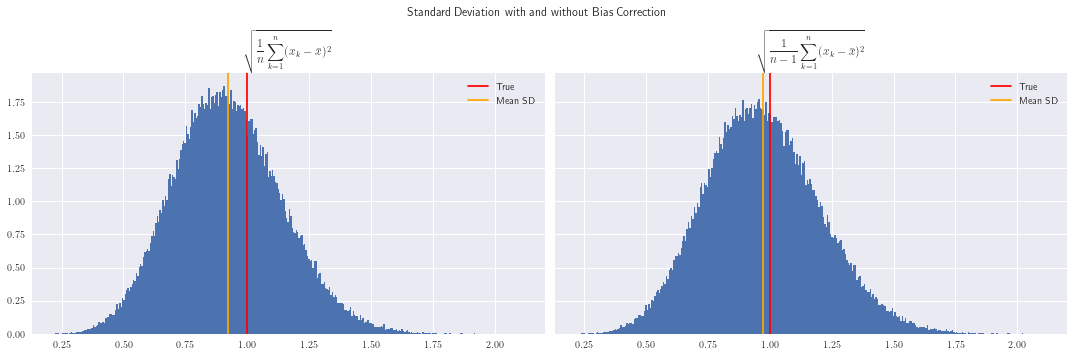

In [117]:
# Import modules
import numpy as np, matplotlib.pyplot as plt
from scipy.stats import norm

# Use LaTeX
plt.rcParams['text.usetex'] = True

# Use Seaborn style
plt.style.use('seaborn')

# Set random seed
np.random.seed(0)

# Define number of trials
trials = 100_000

# Generate normal rvs with mean 0 and variance 1
Z = norm.rvs(loc = 0, scale = 1, size = (trials, 10))

# Calculate the sd without bias correction
sd0 = np.apply_along_axis(lambda arr: np.std(arr, ddof = 0), 1, Z)

# Calculate the sd with bias correction
sd1 = np.apply_along_axis(lambda arr: np.std(arr, ddof = 1), 1, Z)

# Set up subplots
fig, ax = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (15, 5))

ax[0].hist(sd0, bins = int(np.sqrt(trials)), density = True)
ax[0].axvline(x = 1, color = 'red', label = 'True')
ax[0].axvline(x = np.mean(sd0), color = 'orange', label = 'Mean SD')

ax[0].legend()
ax[0].title.set_text(r'$\displaystyle\sqrt{\frac{1}{n}\sum_{k = 1}^n (x_k - \bar{x})^2}$')

ax[1].hist(sd1, bins = int(np.sqrt(trials)), density = True)
ax[1].axvline(x = 1, color = 'red', label = 'True')
ax[1].axvline(x = np.mean(sd1), color = 'orange', label = 'Mean SD')

ax[1].legend()
ax[1].title.set_text(r'$\displaystyle\sqrt{\frac{1}{n - 1}\sum_{k = 1}^n (x_k - \bar{x})^2}$')

# Give entire figure title
fig.suptitle('Standard Deviation with and without Bias Correction')

# Add padding
fig.tight_layout(pad = 1)

# Save the figure
plt.savefig(path + r'ex3-7.png')

plt.show()